# Plot end of century zonal sAOD and temperature change

In [1]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

ERROR 1: PROJ: proj_create_from_database: Open of /home/h05/awells/.conda/envs/env/share/proj failed


## Load and process temp data

In [2]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_temp_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

Calculate end of century average and zonal mean

In [11]:
ssp245_zonal = ssp245.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))
ssp585_zonal = ssp585.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))
g6sulf_zonal = g6sulf.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))
g6con_zonal = g6con.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))

Calculate ensemble mean

In [12]:
ssp245_ensemble = ssp245_zonal.mean('realization')
ssp585_ensemble = ssp585_zonal.mean('realization')
g6sulf_ensemble = g6sulf_zonal.mean('realization')
g6con_ensemble = g6con_zonal.mean('realization')

## Load and process sAOD data

In [4]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_saod_full_'

g6con_aod = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf_aod = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

Calculate end of century average and zonal mean

In [13]:
g6sulf_aod_zonal = g6sulf_aod.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))
g6con_aod_zonal = g6con_aod.sel(time=slice('2080', '2101')).mean(dim=('time', 'longitude'))

Calculate ensemble mean

In [14]:
g6sulf_aod_ensemble = g6sulf_aod_zonal.mean('realization')
g6con_aod_ensemble = g6con_aod_zonal.mean('realization')

## Calculate correlation

In [6]:
g6con_diff = g6sulf_ensemble - ssp245_ensemble
g6sulf_diff = g6con_ensemble - ssp245_ensemble

In [7]:
import scipy.stats

print('G6sulfur Spearman correlation:', scipy.stats.spearmanr(g6sulf_aod_ensemble, g6sulf_diff).correlation)
print('G6controller Spearman correlation:', scipy.stats.spearmanr(g6con_aod_ensemble, g6con_diff).correlation)

G6sulfur Spearman correlation: -0.7224821155855639
G6controller Spearman correlation: 0.4245920745920746


## Plotting

In [8]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

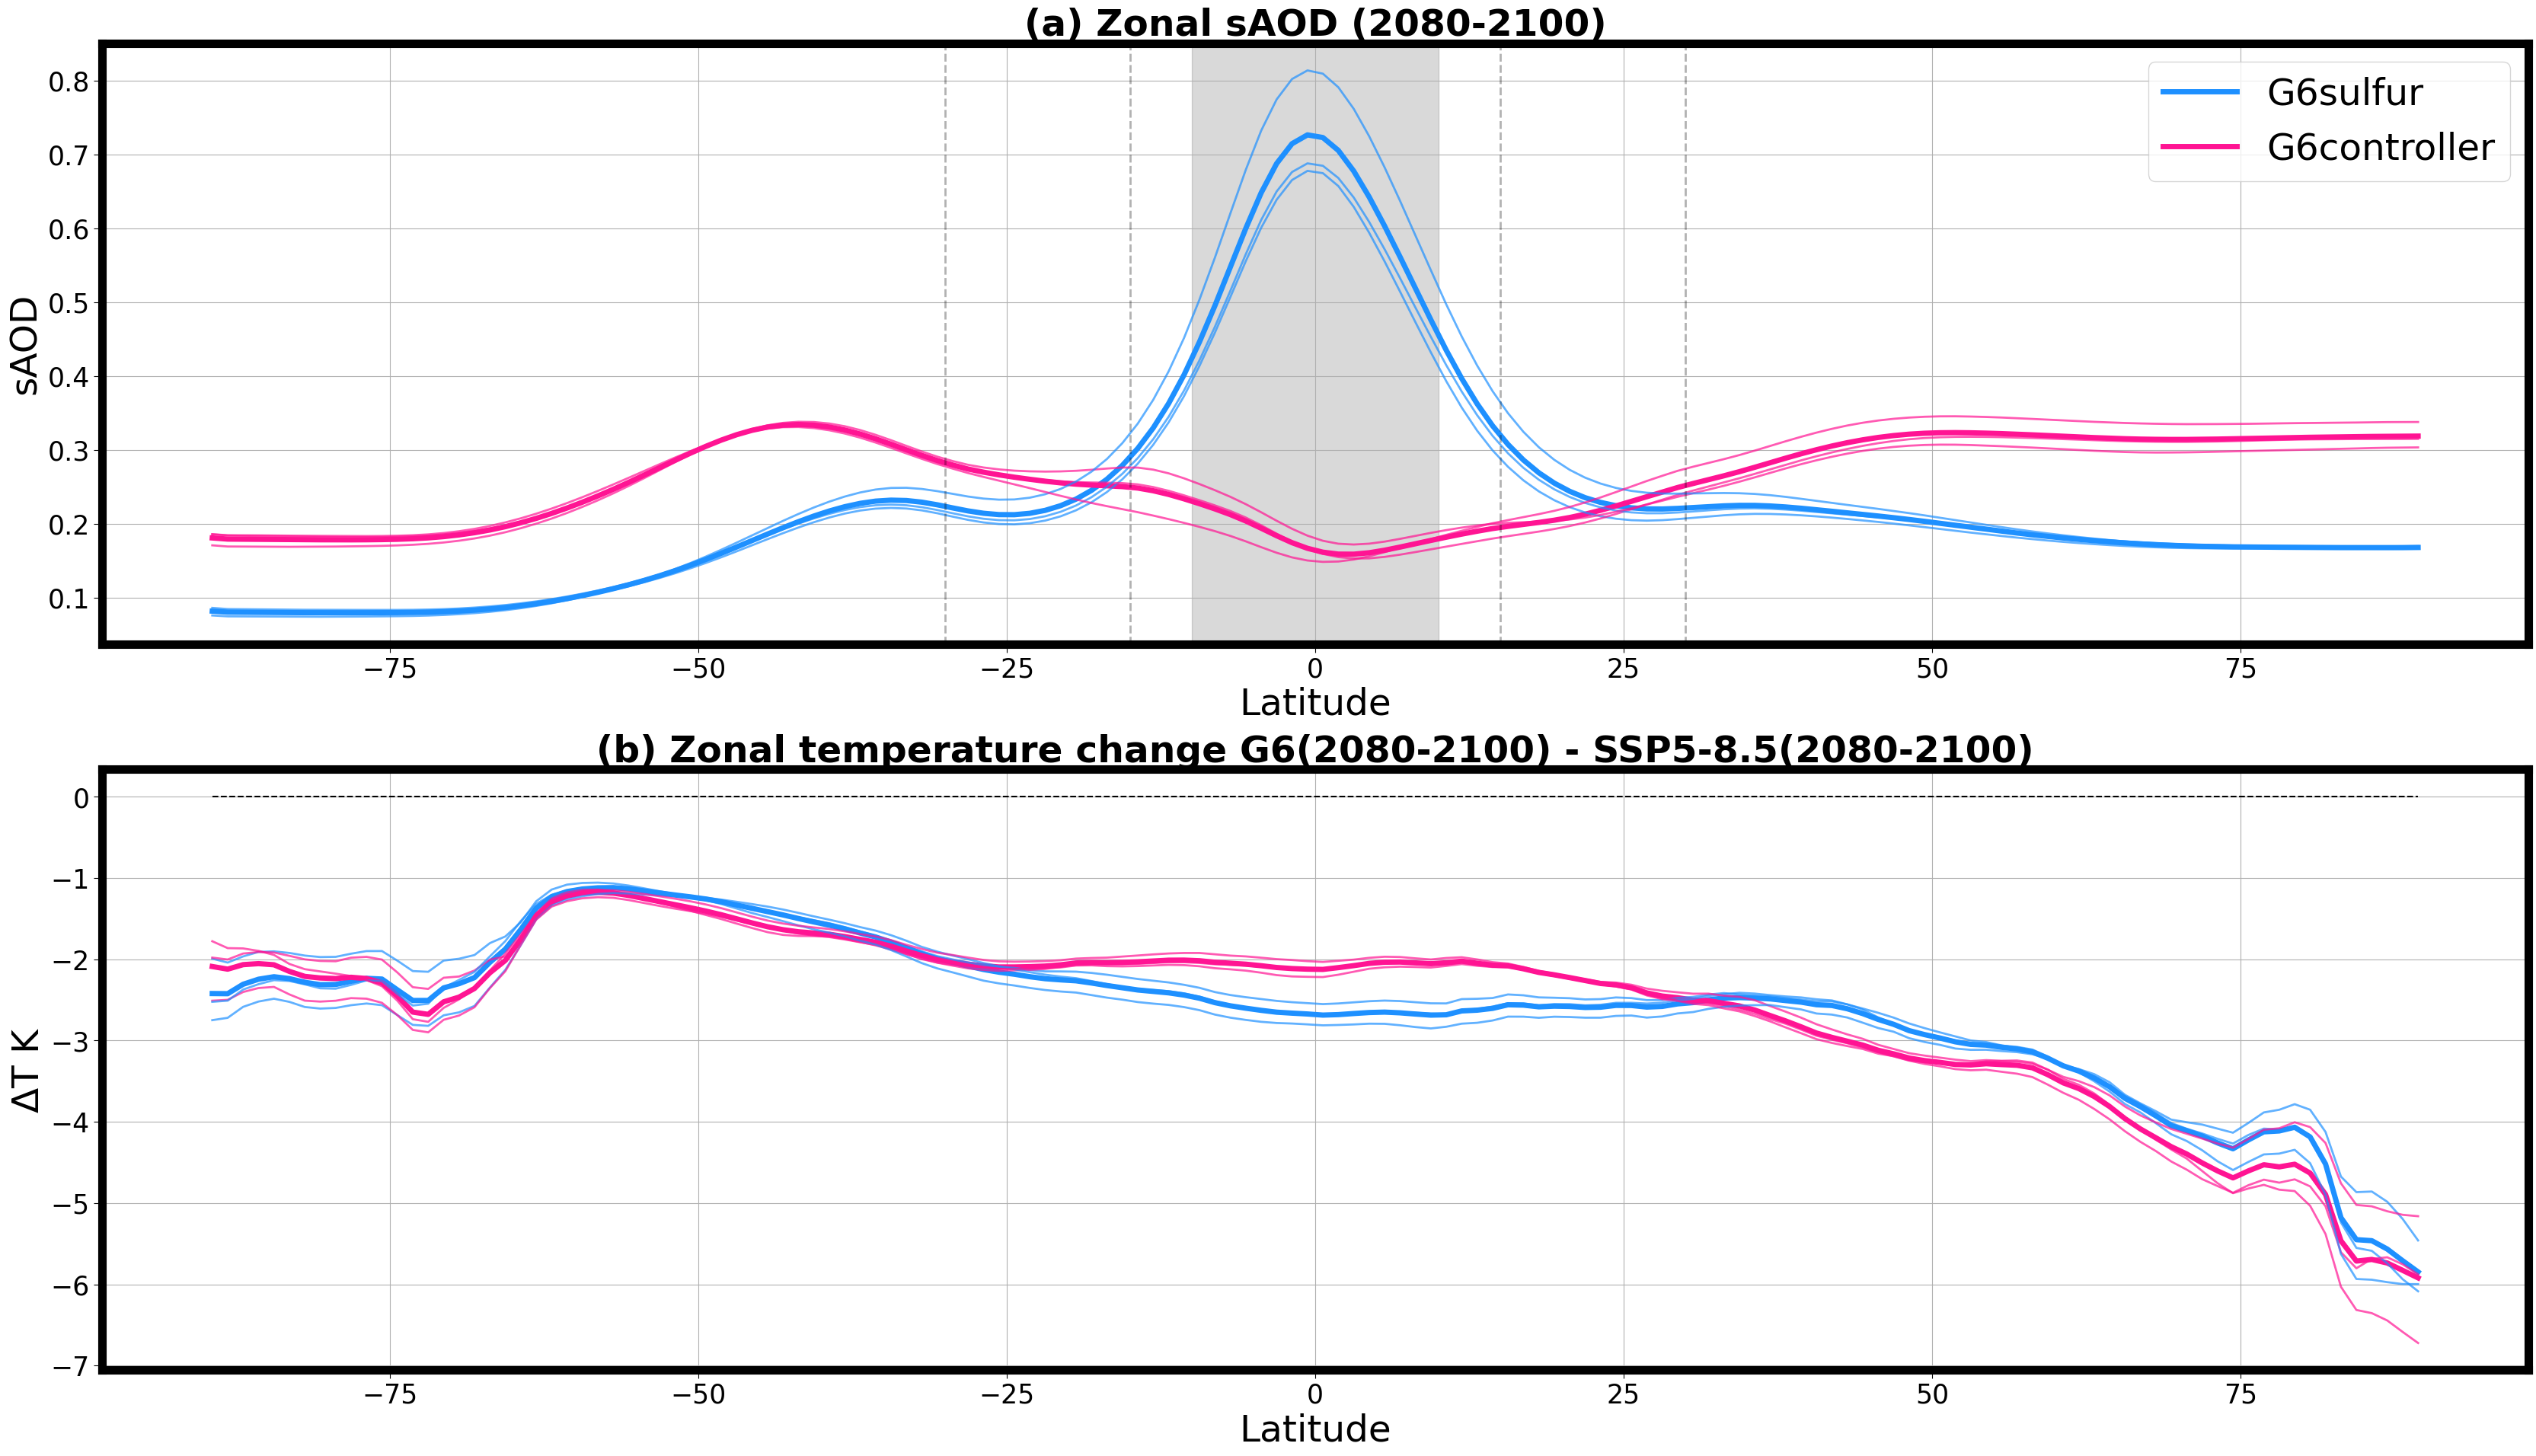

In [16]:
fig = plt.figure(figsize=autosize_figure(2, 1, scale_factor=2, xscale_factor=2))
gs = GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
g6sulf_aod_ensemble.plot(color = 'dodgerblue', linewidth = 5, label = 'G6sulfur')
g6con_aod_ensemble.plot(color = 'deeppink', linewidth = 5, label = 'G6controller')

for i in range(3):
    g6sulf_aod_zonal[i, :].plot(color = 'dodgerblue', linewidth = 2, alpha = 0.7)
    g6con_aod_zonal[i, :].plot(color = 'deeppink', linewidth = 2, alpha = 0.7)  

plt.axvline(-30, color='k', linestyle='--', linewidth=2, alpha=0.3)
plt.axvline(-15, color='k', linestyle='--', linewidth=2, alpha=0.3)
plt.axvline(15, color='k', linestyle='--', linewidth=2, alpha=0.3)
plt.axvline(30, color='k', linestyle='--', linewidth=2, alpha=0.3)

plt.axvspan(-10, 10, color='k', alpha=0.15)

plt.legend(fontsize=35)
    
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('sAOD', fontsize = 35)
plt.title('(a) Zonal sAOD (2080-2100)', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])
(g6sulf_ensemble - ssp585_ensemble).plot(color = 'dodgerblue', linewidth = 5, label = 'G6sulfur')
(g6con_ensemble - ssp585_ensemble).plot(color = 'deeppink', linewidth = 5, label = 'G6controller')
plt.plot(ssp585_zonal['latitude'], np.zeros((144)), color = 'k', linestyle = '--')

for i in range(3):
    (g6sulf_zonal[i, :] - ssp585_zonal[i, :]).plot(color = 'dodgerblue', linewidth = 2, alpha = 0.7)
    (g6con_zonal[i, :] - ssp585_zonal[i, :]).plot(color = 'deeppink', linewidth = 2, alpha = 0.7)    

plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('$\Delta$T K', fontsize = 35)
plt.title('(b) Zonal temperature change G6(2080-2100) - SSP5-8.5(2080-2100)', fontweight='bold')

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure4.png', dpi=200)
plt.show()